In [26]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import re

-------------------------------

In [3]:
env = gym.make("Pendulum-v1")
env._max_episode_steps = 100

In [4]:
theta_space = np.linspace(-1,1,10)
dot_space = np.linspace(-8,8,10)
act_space = np.linspace(-2,2,10)

In [5]:
def get_state(observation):
    cos, sin, dot = observation
    cth = int(np.digitize(cos,theta_space))
    sth = int(np.digitize(sin,theta_space))
    dth = int(np.digitize(dot,dot_space))
    return (cth + sth + dth)

In [6]:
def get_act(action):
    act = action
    ath = (np.digitize(act,act_space))
    ath = int(ath)
    return ath

In [55]:
def get_stato(obs_):
    cos = a
    sin = b
    dot = c
    cth = int(np.digitize(cos,theta_space))
    sth = int(np.digitize(sin,theta_space))
    dth = int(np.digitize(dot,dot_space))
    return (cth + sth + dth/3)

In [8]:
rewa = []
pstate = []
pactions = []

In [88]:
obs = env.reset()
for i in range(100):
    action = env.action_space.sample()
    staterun = get_state(obs)
    pstate.append(staterun)
    actrun = get_act(action)
    pactions.append(actrun)
    obs, reward, done, info = env.step(action)

In [96]:
pstate = list(dict.fromkeys(pstate))
pstate.sort()
pstate.append(0)
print(pstate)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 0]


In [90]:
pactions = list(dict.fromkeys(pactions))
pactions.sort()
#pactions.append(0)
print(pactions)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [91]:
N_STATES = len(pstate)
N_ACTIONS = len(pactions)

------------------------------------

In [61]:
def max_action(Q, state, action=pactions):
    values = np.array([Q[np.round(state),a] for a in action])
    action = np.argmax(values)
    return action

In [2]:
n_games = 100
alpha = 0.1
gamma = 0.99
eps = 0.1
score = 0

In [97]:
action_space = pactions
states = []
for cth in range(11):
    for sth in range(11): 
        for dth in range(11):
            states.append((cth+sth+dth))

In [98]:
Q = {}
for state in states:
    for action in action_space:
        Q[state,action] = 0

In [129]:
Q

{(0, 0): 0,
 (0, 1): 0,
 (0, 2): 0,
 (0, 3): 0,
 (0, 4): 0,
 (0, 5): 0,
 (0, 6): 0,
 (0, 7): 0,
 (0, 8): 0,
 (0, 9): 0,
 (1, 0): 0,
 (1, 1): 0,
 (1, 2): 0,
 (1, 3): 0,
 (1, 4): 0,
 (1, 5): 0,
 (1, 6): 0,
 (1, 7): 0,
 (1, 8): 0,
 (1, 9): 0,
 (2, 0): 0,
 (2, 1): 0,
 (2, 2): 0,
 (2, 3): 0,
 (2, 4): 0,
 (2, 5): 0,
 (2, 6): 0,
 (2, 7): 0,
 (2, 8): 0,
 (2, 9): 0,
 (3, 0): 0,
 (3, 1): 0,
 (3, 2): 0,
 (3, 3): 0,
 (3, 4): 0,
 (3, 5): 0,
 (3, 6): 0,
 (3, 7): 0,
 (3, 8): 0,
 (3, 9): 0,
 (4, 0): 0,
 (4, 1): 0,
 (4, 2): 0,
 (4, 3): 0,
 (4, 4): 0,
 (4, 5): 0,
 (4, 6): 0,
 (4, 7): 0,
 (4, 8): 0,
 (4, 9): 0,
 (5, 0): 0,
 (5, 1): 0,
 (5, 2): 0,
 (5, 3): 0,
 (5, 4): 0,
 (5, 5): 0,
 (5, 6): 0,
 (5, 7): 0,
 (5, 8): 0,
 (5, 9): 0,
 (6, 0): 0,
 (6, 1): 0,
 (6, 2): 0,
 (6, 3): 0,
 (6, 4): 0,
 (6, 5): 0,
 (6, 6): 0,
 (6, 7): 0,
 (6, 8): 0,
 (6, 9): 0,
 (7, 0): 0,
 (7, 1): 0,
 (7, 2): 0,
 (7, 3): 0,
 (7, 4): 0,
 (7, 5): 0,
 (7, 6): 0,
 (7, 7): 0,
 (7, 8): 0,
 (7, 9): 0,
 (8, 0): 0,
 (8, 1): 0,
 (8, 2): 0,
 (8,

--------------------

In [154]:
def sarsa(obs_,state,action):
        score = 0
        state_ = get_stato(obs_)
        state_ = np.round(state_)
        action_ = max_action(Q, state_) if np.random.random() > eps else env.action_space.sample()
        action_ = np.round(action_)
        action_ = action_.astype(int)
        score += reward
        Q[state, action] = Q[np.round(state),action.astype(int)] + alpha*(reward+gamma*Q[state_,action_] - Q[np.round(state),action])
        state = state_
        action = action_

In [165]:
def sarsalambda(obs_,state,action):
        score = 0
        lam = 0.8
        state_ = get_stato(obs_)
        state_ = np.round(state_)
        action_ = max_action(Q, state_) if np.random.random() > eps else env.action_space.sample()
        action_ = np.round(action_)
        action_ = action_.astype(int)
        score += reward
        Q[state, action] = Q[np.round(state),action.astype(int)] + alpha*(reward+gamma*lam*Q[state_,action_] - Q[np.round(state),action])
        state = state_
        action = action_

------------------------------

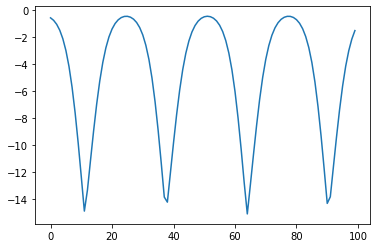

In [158]:
atotal_reward = []
obs = env.reset()
state = get_state(obs)
state = np.round_(state,decimals=0)
action = max_action(Q, state) if np.random.random() > eps else env.action_space.sample()
for i in range(n_games):
    obs_,reward, done, info = env.step([action])
    atotal_reward.append(reward)
    a, b, c = obs_
    sarsa(obs_,state,action)
eps = eps - 2 / n_games if eps > 0.01 else 0.01
plt.plot(atotal_reward)
plt.show()

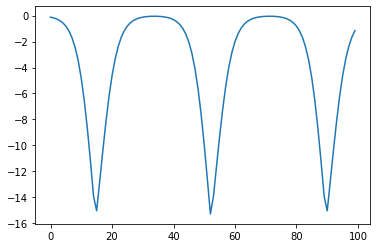

In [178]:
btotal_reward = []
obs = env.reset()
state = get_state(obs)
state = np.round_(state,decimals=0)
action = max_action(Q, state) if np.random.random() > eps else env.action_space.sample()
for i in range(n_games):
    obs_,reward, done, info = env.step([action])
    btotal_reward.append(reward)
    a, b, c = obs_
    sarsalambda(obs_,state,action)
eps = eps - 2 / n_games if eps > 0.01 else 0.01
plt.plot(btotal_reward)
plt.show()